#**Airplane Crashes TimeSeries Analysis**
*Author*: **LAGAGNA Razane**

#**Abstract**
This project explores time series analysis of historical airplane crash data to forecast future incidents. The dataset spans from 1915 to 2009, capturing the annual number of crashes over nearly a century. Our objective is to develop a predictive model that accurately estimates future airplane crashes based on historical trends. By analyzing past patterns, we aim to provide insights that support aviation safety improvements and risk mitigation strategies.

#**Introduction**
Air travel is a cornerstone of global transportation, facilitating millions of flights each year. Despite significant advancements in aviation technology and safety measures, airplane crashes remain a critical concern due to their impact on human lives and public confidence. Understanding historical trends in crash occurrences can provide valuable insights for enhancing safety protocols and risk management.

This study focuses on examining long-term patterns in airplane crash data using time series analysis. By investigating historical crash frequencies, we aim to identify trends, potential seasonality, and underlying factors influencing crash rates. The ultimate goal is to develop a forecasting model that can predict future crash occurrences with greater accuracy. Through this analysis, we seek to contribute to the ongoing efforts in aviation safety by providing data-driven insights that can inform preventative measures and policy-making.

#**1-Data Selection**


In [1]:
install.packages('TSA')
install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




In [2]:
library(dplyr)

df <- read.csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
str(df)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	5268 obs. of  13 variables:
 $ Date        : chr  "09/17/1908" "07/12/1912" "08/06/1913" "09/09/1913" ...
 $ Time        : chr  "17:18" "06:30" "" "18:30" ...
 $ Location    : chr  "Fort Myer, Virginia" "AtlantiCity, New Jersey" "Victoria, British Columbia, Canada" "Over the North Sea" ...
 $ Operator    : chr  "Military - U.S. Army" "Military - U.S. Navy" "Private" "Military - German Navy" ...
 $ Flight..    : chr  "" "" "-" "" ...
 $ Route       : chr  "Demonstration" "Test flight" "" "" ...
 $ Type        : chr  "Wright Flyer III" "Dirigible" "Curtiss seaplane" "Zeppelin L-1 (airship)" ...
 $ Registration: chr  "" "" "" "" ...
 $ cn.In       : chr  "1" "" "" "" ...
 $ Aboard      : int  2 5 1 20 30 41 19 20 22 19 ...
 $ Fatalities  : int  1 5 1 14 30 21 19 20 22 19 ...
 $ Ground      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Summary     : chr  "During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a heig"| __truncated__ "First

**Source of the data:** https://www.kaggle.com/datasets/imtkaggleteam/airplane-crashes/data

The dataset contains information about airplane crashes, including details such as date, time, location, operator, flight, route, type of aircraft, registration number, aircraft construction number, number of people aboard, number of fatalities, number of ground casualties, and a summary of the crash.

- **Date:** The date when the airplane crash occurred.
- **Time:** The time of the crash.
- **Location:** The geographical location (city, country) where the crash occurred.
- **Operator:** The airline or operator of the aircraft involved in the crash.
- **Flight:** Flight number or identifier.
- **Route:** The planned route of the flight.
- **Type:** The type or model of the aircraft involved.
- **Registration:** The registration number of the aircraft.
- **Cn_in:** The aircraft construction number.
- **Aboard:** The total number of people aboard the aircraft.
- **Fatalities:** The number of fatalities resulting from the crash.
- **Ground:** The number of ground casualties (if any).
- **Summary:** A brief summary or description of the crash.

###Handling Dates and Aggregating Crashes Per Year

1. Convert `Date` Column to Date Format
The dataset contains a `Date` column, which is originally in **MM/DD/YYYY** format. To ensure proper date handling in R, we convert it to **Date format** using the `as.Date()` function:
2. We extract the year from each crash record and group the data to count the number of crashes per year. This is achieved using the dplyr package:


In [3]:
# Convert Date column to Date format
df$Date <- as.Date(df$Date, format = "%m/%d/%Y")

# Extract year from Date and group crashes per year
crashes_per_year <- df %>%
  mutate(year = as.integer(format(Date, "%Y"))) %>%
  group_by(year) %>%
  summarize(num_of_crashes = n())

# Print the resulting dataset
print(crashes_per_year)

# A tibble: 98 × 2
    year num_of_crashes
   <int>          <int>
 1  1908              1
 2  1912              1
 3  1913              3
 4  1915              2
 5  1916              5
 6  1917              6
 7  1918              4
 8  1919              6
 9  1920             17
10  1921             13
# ℹ 88 more rows


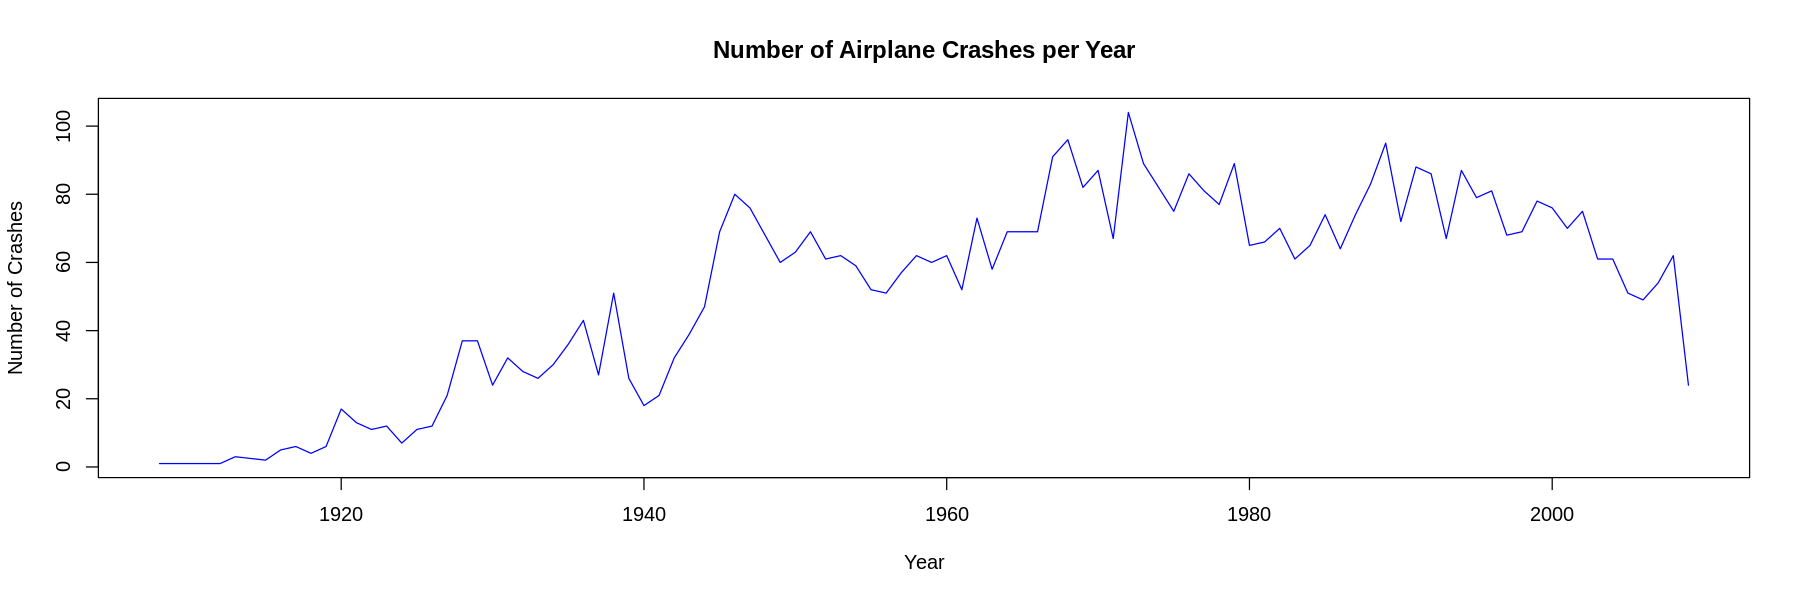

In [4]:
# Plotting the number of crashes per year
options(repr.plot.width = 15, repr.plot.height = 5)

plot(crashes_per_year$year, crashes_per_year$num_of_crashes,
     type = "l",
     col = "blue",
     xlab = "Year", ylab = "Number of Crashes",
     main = "Number of Airplane Crashes per Year")


After visualizing the data through plotting, a clear upward trend emerges, indicating a consistent increase in values over time. This trend suggests that the dataset is non-stationary, as it exhibits systematic changes in both mean and variance over the observed period. Additionally, the absence of recurring patterns confirms that the data lacks seasonality or periodicity.

We will still perform an **Augmented Dickey-Fuller (ADF)** test to formally verify whether the time series data on airplane crashes lacks stationarity.

In [5]:
library(tseries)

# We split the data into training and testing sets
# --- (90% for training)
split_index <- floor(0.9 * nrow(crashes_per_year))

# ---Create training and testing datasets
train_data <- crashes_per_year[1:split_index, ]
test_data <- crashes_per_year[(split_index + 1):nrow(crashes_per_year), ]


# Perform Augmented Dickey-Fuller (ADF) test on the data
adf_result <- adf.test(crashes_per_year$num_of_crashes)

# Print the ADF test results
print(adf_result)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Augmented Dickey-Fuller Test

data:  crashes_per_year$num_of_crashes
Dickey-Fuller = -0.6671, Lag order = 4, p-value = 0.9706
alternative hypothesis: stationary



**Interpreting the Results:**

The test statistic is -0.6671.

The p-value is 0.9706.

The null hypothesis (H₀) states that the data is non-stationary.

The alternative hypothesis (H₁) states that the data is stationary.

Since the p-value (0.9706) is greater than 0.05, we fail to reject the null hypothesis.
This means that there is not enough evidence to conclude that the time series is stationary.

**Conclusion:**

The time series appears to be *non-stationary*, meaning that its mean and variance change over time.

To make the data stationary, we may need to apply differencing (e.g., first or second-order differencing) before proceeding with time series modeling.

# **2-Model Specification**

The variance of the time series data on airplane crashes is not stable, indicating the presence of heteroscedasticity. To mitigate this issue, we will apply a **variance-stabilizing transformation using the Box-Cox method**. The optimal lambda parameter for this transformation is determined by maximizing the log-likelihood function, ensuring the best possible fit for the data.

To achieve this, we will use the BoxCox.Ar() function, which automatically identifies the optimal lambda value. This value corresponds to the transformation that maximizes the log-likelihood, ensuring the most effective variance stabilization for the dataset.


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem

[1] 0.5


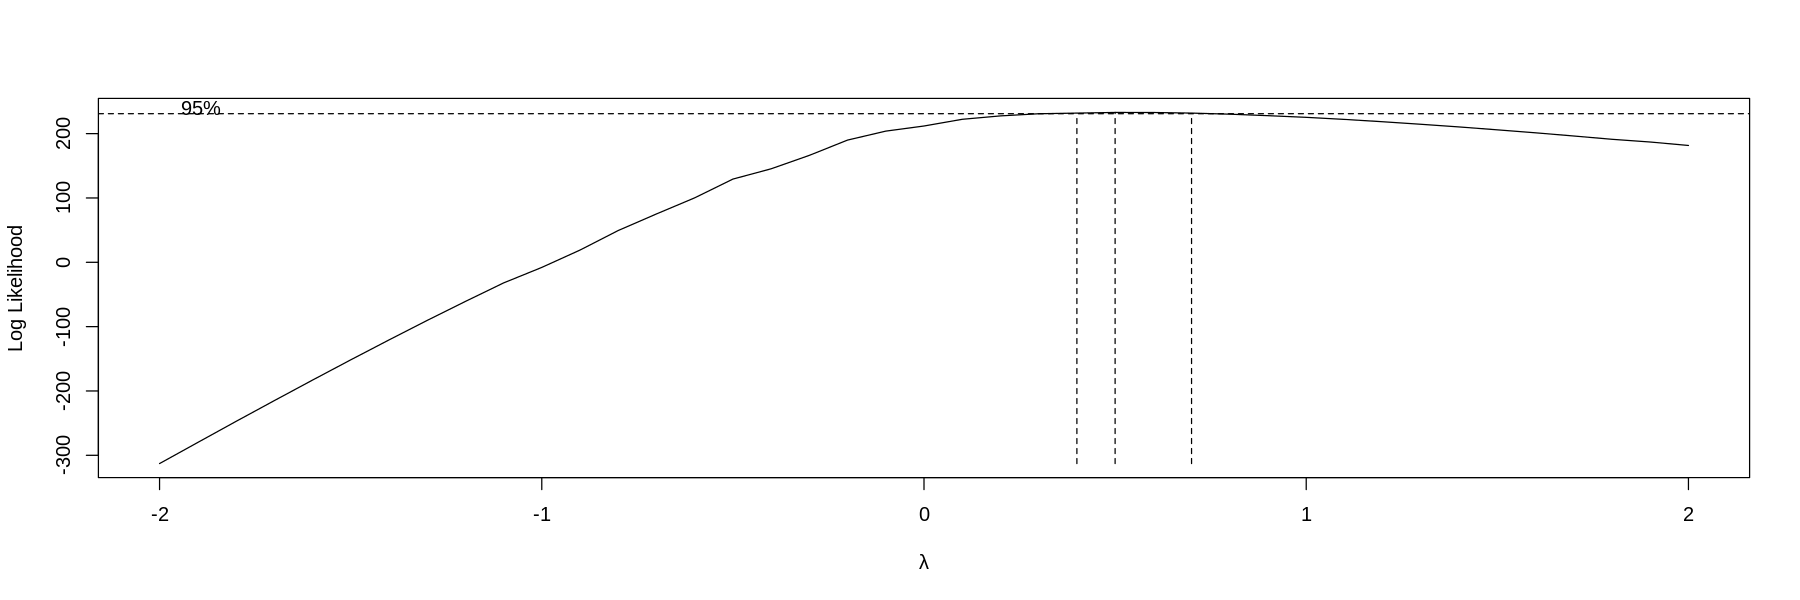

In [6]:
library(MASS)
library(TSA)

# Perform Box-Cox transformation
boxcox_result <- BoxCox.ar(crashes_per_year$num_of_crashes)

# Extract lambda values and log-likelihoods
lambda_values <- boxcox_result$lambda
log_likelihoods <- boxcox_result$loglik

# Find the index of the lambda value with maximum log-likelihood
max_log_likelihood_index <- which.max(log_likelihoods)

# Extract the optimal lambda value
optimal_lambda <- lambda_values[max_log_likelihood_index]

# Print the optimal lambda value
print(optimal_lambda)


The optimal lambda value obtained for the Box-Cox transformation using the `BoxCox.Ar()` function is 0.5. In the context of Box-Cox transformation, a lambda value of 0.6 almost corresponds to taking the square root of the data. Therefore, we will perform the Box-Cox transformation using lambda = 0.5 to stabilize the variance of the time series data related to airplane crashes.

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



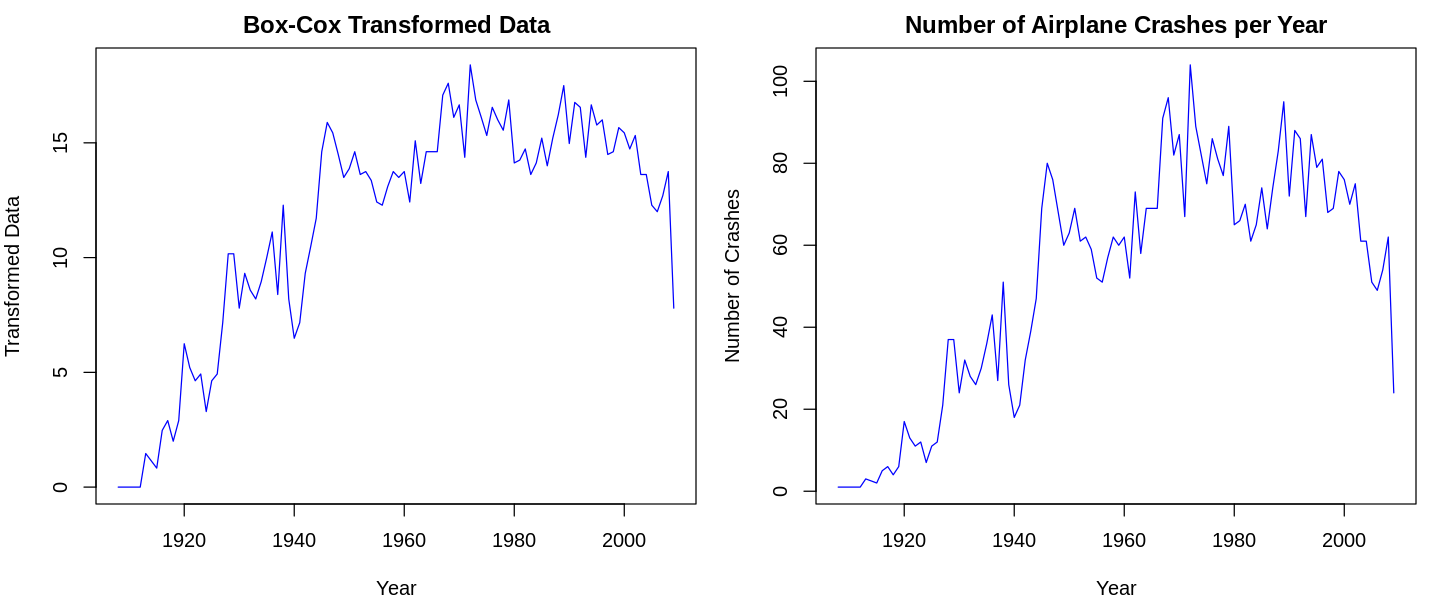

In [7]:
library(forecast)
library(repr)
options(repr.plot.width = 12, repr.plot.height = 5)


# Apply Box-Cox transformation
transformed_data <- BoxCox(crashes_per_year$num_of_crashes, lambda = optimal_lambda)

# Set up 2 plots side by side
par(mfrow = c(1, 2), mar = c(4, 4, 2, 1))  # Adjust margins for better spacing

# Plot 1: Box-Cox Transformed Data
plot(crashes_per_year$year, transformed_data,
     type = "l",
     col = "blue",
     xlab = "Year", ylab = "Transformed Data",
     main = "Box-Cox Transformed Data")

# Plot 2: Original Number of Crashes
plot(crashes_per_year$year, crashes_per_year$num_of_crashes,
     type = "l",
     col = "blue",
     xlab = "Year", ylab = "Number of Crashes",
     main = "Number of Airplane Crashes per Year")

par(mfrow = c(1, 1))


In [8]:
library(tseries)
adf.test(transformed_data)


	Augmented Dickey-Fuller Test

data:  transformed_data
Dickey-Fuller = -0.91, Lag order = 4, p-value = 0.9482
alternative hypothesis: stationary


>After applying the Box-Cox transformation, the test statistic is -0.91, with a p-value of 0.9482, which is much higher than the typical significance level of 0.05. This means we fail to reject the null hypothesis, indicating that the series is non-stationary.

>Since the presence of a trend can lead to non-stationarity, we apply differencing to remove the trend and stabilize the mean of the series, making it suitable for time series modeling.

The next step in our analysis involves eliminating the trend by applying the **first-order differencing** to the time series data. This technique is widely used in time series analysis to stabilize the data by removing trends or seasonal patterns, thereby making it more stationary.

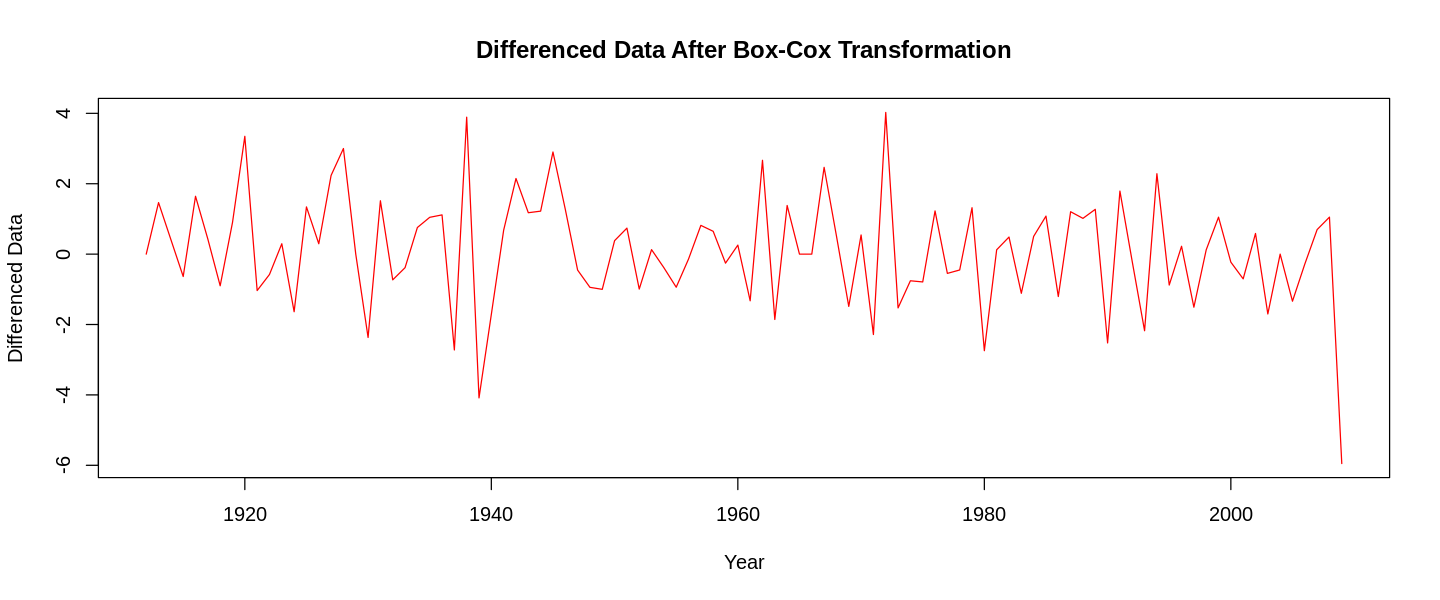

In [9]:
# Perform differencing on the transformed data
differenced_data <- diff(transformed_data)

# Plot the differenced data
plot(crashes_per_year$year[-1], differenced_data,
     type = "l",
     col = "red",
     xlab = "Year", ylab = "Differenced Data",
     main = "Differenced Data After Box-Cox Transformation")

After applying first-order differencing to eliminate the trend from our time series data, the next step is to assess **its stationarity**. To do this, we will perform the **Augmented Dickey-Fuller (ADF) test** once again to determine whether the differenced data exhibits stationarity


In [10]:
library(tseries)

# Perform Augmented Dickey-Fuller (ADF) test on differenced data
adf_result <- adf.test(differenced_data)

# Print the ADF test results
print(adf_result)


Warning message in adf.test(differenced_data):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  differenced_data
Dickey-Fuller = -5.7128, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



The warning message "p-value smaller than printed p-value" in the adf.test() function (from the tseries package in R) means that the true p-value is lower than the smallest value that the function can report. In this case, it reports 0.01, but the actual p-value could be even smaller (e.g., 0.005 or 0.0001).

**Interpretation of ADF Test Results:**

Dickey-Fuller Statistic = -5.7128: This is the test statistic, which is compared to critical values to determine stationarity.

Lag order = 4: The number of lags used in the test.

p-value = 0.01: This indicates that the test strongly rejects the null hypothesis (though it could be even smaller due to the warning message).

Null Hypothesis (H₀): The series has a unit root (i.e., it is non-stationary).

Alternative Hypothesis (H₁): The series is stationary.

**Conclusion:**

Since the p-value is at most 0.01, which is much lower than common significance levels (0.05 or 0.1), we reject the null hypothesis. This means that the differenced data is likely stationary, which is a good sign for time series modeling.


---



Since we have confirmed the stationarity of the first-order differenced data (d = 1), we can now proceed to determine the appropriate values for p and q in our ARIMA model. These parameters define the structure of the model as follows:

**p (autoregressive order):** The number of lagged observations included as predictors.

**d (degree of differencing):** The number of times the data has been differenced to achieve stationarity (confirmed as d = 1).

**q (moving average order):** The number of past forecast errors included in the model.

#**3-Candidate Models**


To determine the best values for p and q, we will follow a systematic approach:

  **1-Analyze ACF and PACF Plots:**
  The Autocorrelation Function (ACF) helps identify potential values for q by examining significant spikes at different lags.

  **2-Compare Candidate Models Using AIC and BIC:**
  We will fit multiple ARIMA models with different p and q values and evaluate them using the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC).
  The model with the lowest AIC/BIC values provides the best trade-off between model fit and complexity.

  **3-Use Auto-ARIMA for Model Selection:**
  To automate and refine our selection, we will leverage the auto.arima() function, which searches for the best ARIMA configuration by optimizing AIC/BIC.

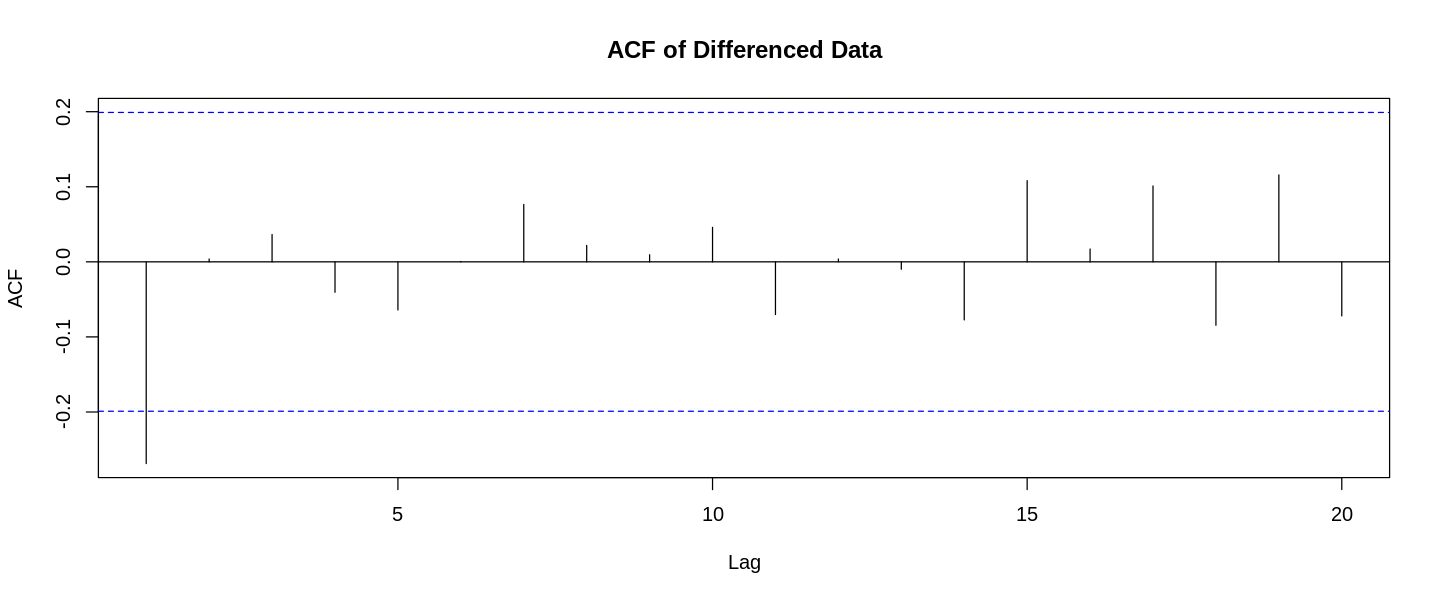

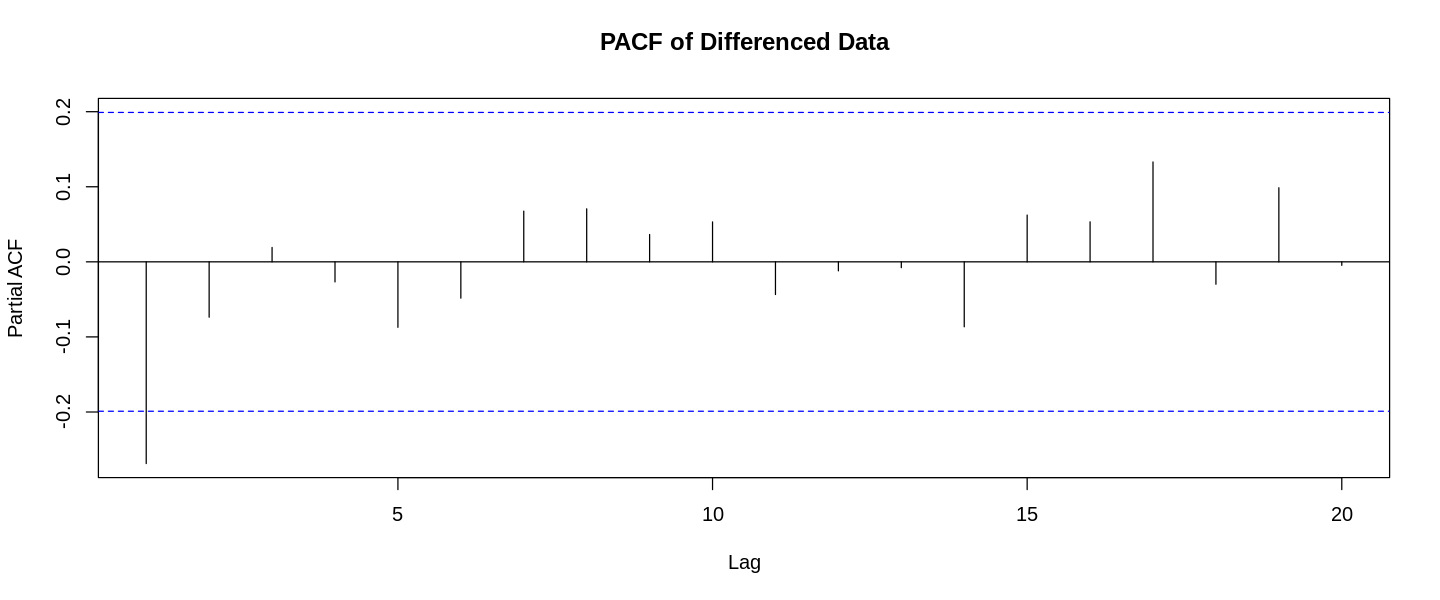

In [11]:
# Plot ACF and PACF of differenced data
acf_differenced <- acf(differenced_data, lag.max = 20, plot = TRUE, main = "ACF of Differenced Data")
pacf_differenced <- pacf(differenced_data, lag.max = 20, plot = TRUE, main = "PACF of Differenced Data")


The ACF and PACF plots of the first-order differenced data exhibit significant correlations only at lag 1, suggesting that an **ARIMA(1,1,1)** model may be appropriate. This implies that the data can be effectively modeled using an **AR(1) component** (one autoregressive term) and an **MA(1) component** (one moving average term).


---


To confirm the suitability of this model, we will evaluate alternative ARIMA specifications using the **Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)**, which help identify the model that best balances goodness of fit and complexity.

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“9  linear dependencies found”


Reordering variables and trying again:


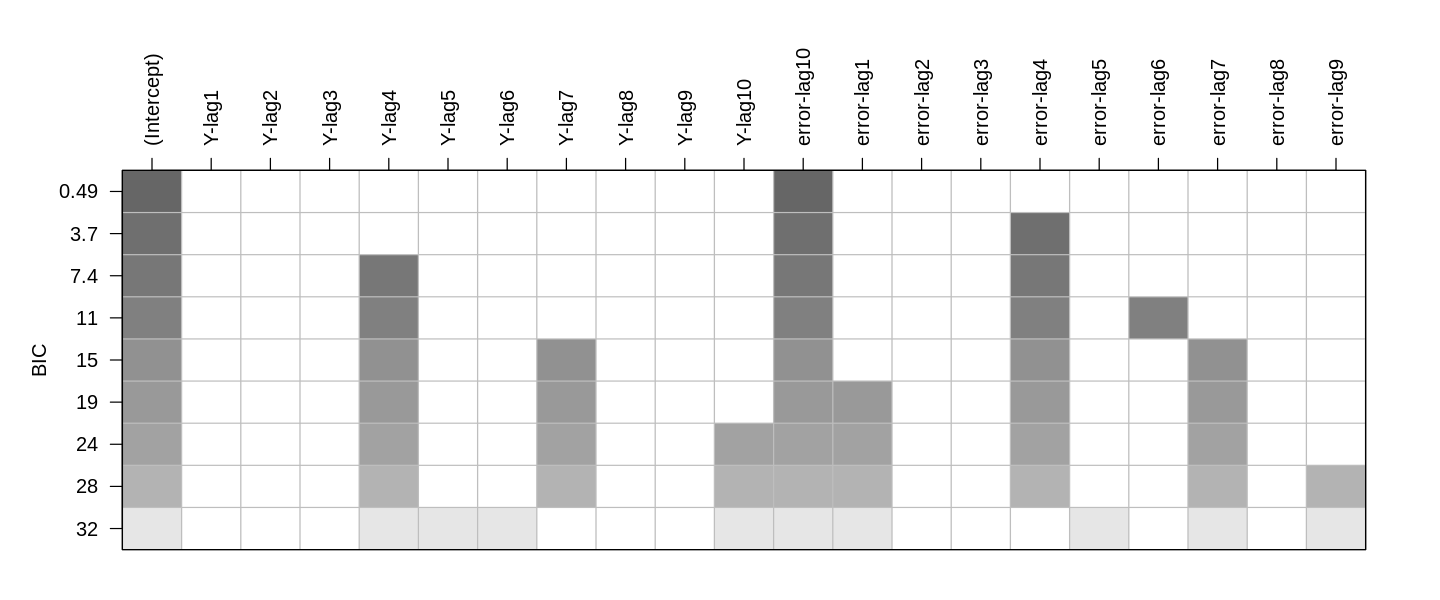

In [12]:
library(TSA)

# Plot the ARIMA model selection results using armasubsets
plot(armasubsets(differenced_data, nar = 10, nma = 10))


The model with the lowest BIC value is the best choice.
Significant selections at y-lag1 and error-lag1 support an **ARIMA(1,1,1)** model.

To finalize model selection, confirm these findings by fitting and comparing models using AIC/BIC values.

In [13]:
library(forecast)

# Use auto.arima() to automatically select the best ARIMA model
auto_model <- auto.arima(differenced_data)

# Print the summary of the auto-selected model
print(summary(auto_model))


Series: differenced_data 
ARIMA(0,1,2) 

Coefficients:
          ma1     ma2
      -1.3268  0.3586
s.e.   0.1088  0.1055

sigma^2 = 2.413:  log likelihood = -179.17
AIC=364.34   AICc=364.6   BIC=372.04

Training set error measures:
                     ME     RMSE     MAE MPE MAPE      MASE        ACF1
Training set -0.2196872 1.529284 1.17995 NaN  Inf 0.6156564 -0.02054775


>auto.arima shows that the best model is ARIMA(0,1,2) for the differenced data which means for our original data d=1 because we applied first difference so the model would be ARIMA(0,0,2).

But we apply further analysis



In [14]:
results <- list()

p <- 0:4
d <- 1
q <- 1:4

for (i in p) {
  for (j in q) {
    tryCatch({
      model <- arima(train_data$num_of_crashes, order = c(i, d, j), transform.pars = FALSE)

      residuals <- residuals(model)

      sse <- sum(residuals^2)

      test <- Box.test(residuals, lag = round(log(length(residuals))), type = "Ljung-Box")

      results[[paste("Arima", i, d, j, sep = ",")]] <- list(
        "AIC" = AIC(model),
        "SSE" = sse,
        "p-values" = test$p.value
      )
    }, error = function(e) {
      cat("Skipping model (", i, d, j, ") due to non-stationary AR error\n")
    })
  }
}

print(results)


Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”


Skipping model ( 4 1 3 ) due to non-stationary AR error
$`Arima,0,1,1`
$`Arima,0,1,1`$AIC
[1] 656.2254

$`Arima,0,1,1`$SSE
[1] 9162.776

$`Arima,0,1,1`$`p-values`
[1] 0.8692924


$`Arima,0,1,2`
$`Arima,0,1,2`$AIC
[1] 658.1032

$`Arima,0,1,2`$SSE
[1] 9150.191

$`Arima,0,1,2`$`p-values`
[1] 0.8802231


$`Arima,0,1,3`
$`Arima,0,1,3`$AIC
[1] 659.8765

$`Arima,0,1,3`$SSE
[1] 9124.578

$`Arima,0,1,3`$`p-values`
[1] 0.93093


$`Arima,0,1,4`
$`Arima,0,1,4`$AIC
[1] 660.9811

$`Arima,0,1,4`$SSE
[1] 9025.561

$`Arima,0,1,4`$`p-values`
[1] 0.9932385


$`Arima,1,1,1`
$`Arima,1,1,1`$AIC
[1] 658.07

$`Arima,1,1,1`$SSE
[1] 9146.577

$`Arima,1,1,1`$`p-values`
[1] 0.8864054


$`Arima,1,1,2`
$`Arima,1,1,2`$AIC
[1] 660.0611

$`Arima,1,1,2`$SSE
[1] 9145.555

$`Arima,1,1,2`$`p-values`
[1] 0.8896141


$`Arima,1,1,3`
$`Arima,1,1,3`$AIC
[1] 661.1979

$`Arima,1,1,3`$SSE
[1] 9049.885

$`Arima,1,1,3`$`p-values`
[1] 0.9575619


$`Arima,1,1,4`
$`Arima,1,1,4`$AIC
[1] 662.896

$`Arima,1,1,4`$SSE
[1] 9016.68

$`Arima,

In [15]:
result_df <- data.frame(
  Model = character(length(results)),
  AIC = numeric(length(results)),
  SSE = numeric(length(results)),
  P_Value = numeric(length(results))
)

# Populate the dataframe with results
for (i in 1:length(results)) {
  result_df[i, "Model"] <- names(results)[i]
  result_df[i, "AIC"] <- results[[i]]$AIC
  result_df[i, "SSE"] <- results[[i]]$SSE
  result_df[i, "P_Value"] <- results[[i]]$`p-value`
}

# Print the dataframe
print(result_df)

         Model      AIC      SSE   P_Value
1  Arima,0,1,1 656.2254 9162.776 0.8692924
2  Arima,0,1,2 658.1032 9150.191 0.8802231
3  Arima,0,1,3 659.8765 9124.578 0.9309300
4  Arima,0,1,4 660.9811 9025.561 0.9932385
5  Arima,1,1,1 658.0700 9146.577 0.8864054
6  Arima,1,1,2 660.0611 9145.555 0.8896141
7  Arima,1,1,3 661.1979 9049.885 0.9575619
8  Arima,1,1,4 662.8960 9016.680 0.9811942
9  Arima,2,1,1 659.4785 9080.467 0.9359505
10 Arima,2,1,2 661.4434 9077.091 0.9411484
11 Arima,2,1,3 660.4505 8652.082 0.9656083
12 Arima,2,1,4 664.7679 9002.817 0.9877512
13 Arima,3,1,1 661.4172 9074.503 0.9445111
14 Arima,3,1,2 663.0128 9030.424 0.9858560
15 Arima,3,1,3 664.9440 9022.580 0.9921232
16 Arima,3,1,4 666.7086 8996.120 0.9840918
17 Arima,4,1,1 662.9605 9023.815 0.9867668
18 Arima,4,1,2 664.9253 9020.350 0.9923191
19 Arima,4,1,4 666.3033 6177.730 0.9708265


>The best model based on AIC is ARIMA(0,1,1) with the lowest AIC value of 656.2254, indicating a good balance between model fit and complexity. On the other hand, the best model based on SSE (error value) is ARIMA(4,1,4) with the lowest SSE of 6177.730, suggesting it has the best predictive accuracy.

#**4-Model fitting**
Now, let's have a closer look at the Arima models (0,1,2);(0,1,1) and (4,1,4)



In [16]:
# Fit ARIMA models with different orders
arima_011 <- arima(train_data$num_of_crashes, order = c(0, 1, 1))
arima_012 <- arima(train_data$num_of_crashes, order = c(0, 1, 2))
arima_414 <- arima(train_data$num_of_crashes, order = c(4, 4, 4))

# Print the summary of the model
summary(arima_011)
summary(arima_012)
summary(arima_414)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = train_data$num_of_crashes, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.3969
s.e.   0.0986

sigma^2 estimated as 105.3:  log likelihood = -326.11,  aic = 654.23

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = train_data$num_of_crashes, order = c(0, 1, 2))

Coefficients:
          ma1     ma2
      -0.4065  0.0413
s.e.   0.1050  0.1179

sigma^2 estimated as 105.2:  log likelihood = -326.05,  aic = 656.1

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”
Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = train_data$num_of_crashes, order = c(4, 4, 4))

Coefficients:
          ar1      ar2      ar3      ar4      ma1     ma2     ma3      ma4
      -1.1845  -0.3523  -0.0246  -0.0070  -2.1612  0.5305  1.4404  -0.8096
s.e.      NaN   0.1647   0.1841   0.1069      NaN     NaN     NaN      NaN

sigma^2 estimated as 111.6:  log likelihood = -333.86,  aic = 683.73

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

> Based on the results obtained it is clear that the optimal model is the ARIMA(0,1,1) model.


Now, we will conduct a thorough analysis of the residuals for our model to see how good it is

#**5-Fitting and Diagnostics**

We begin by fitting our ARIMA(0,1,1) to our data.

In [17]:
arima_011 <- arima(train_data$num_of_crashes, order = c(0, 1, 1))

## **Residual Analysis**

After fitting the model, we calculate the standardized residuals for our ARIMA(0,1,1). These standardized residuals allow us to assess the goodness of fit and the adequacy of the model

In [18]:
# Get standardized residuals for ARIMA(0,1,1) model
residuals_011 <- residuals(arima_011) / sqrt(var(residuals(arima_011)))

Now we plot the standardized residuals for ARIMA(0,1,1). These plots provide a visual representation of the residuals' behavior and allow us to assess the goodness of fit and the adequacy of the model

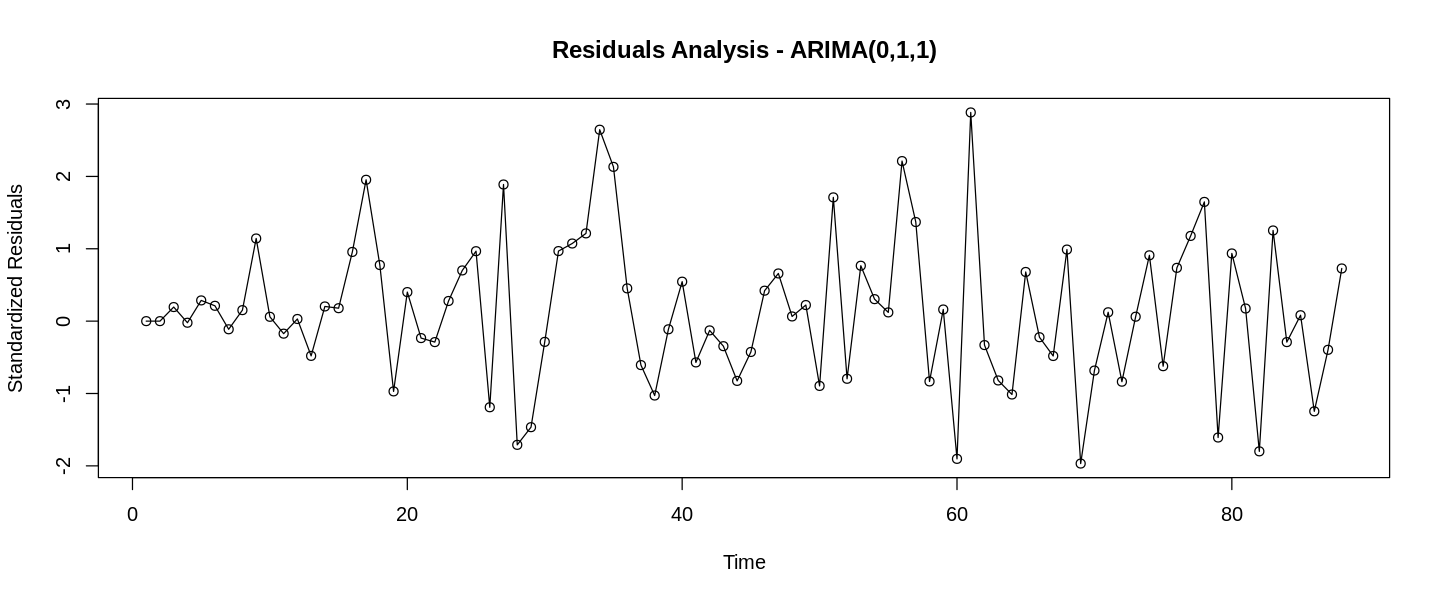

In [19]:
# Plot standardized residuals for ARIMA(0,1,1) model
plot(residuals_011, type = "o", ylab = "Standardized Residuals", main = "Residuals Analysis - ARIMA(0,1,1)")


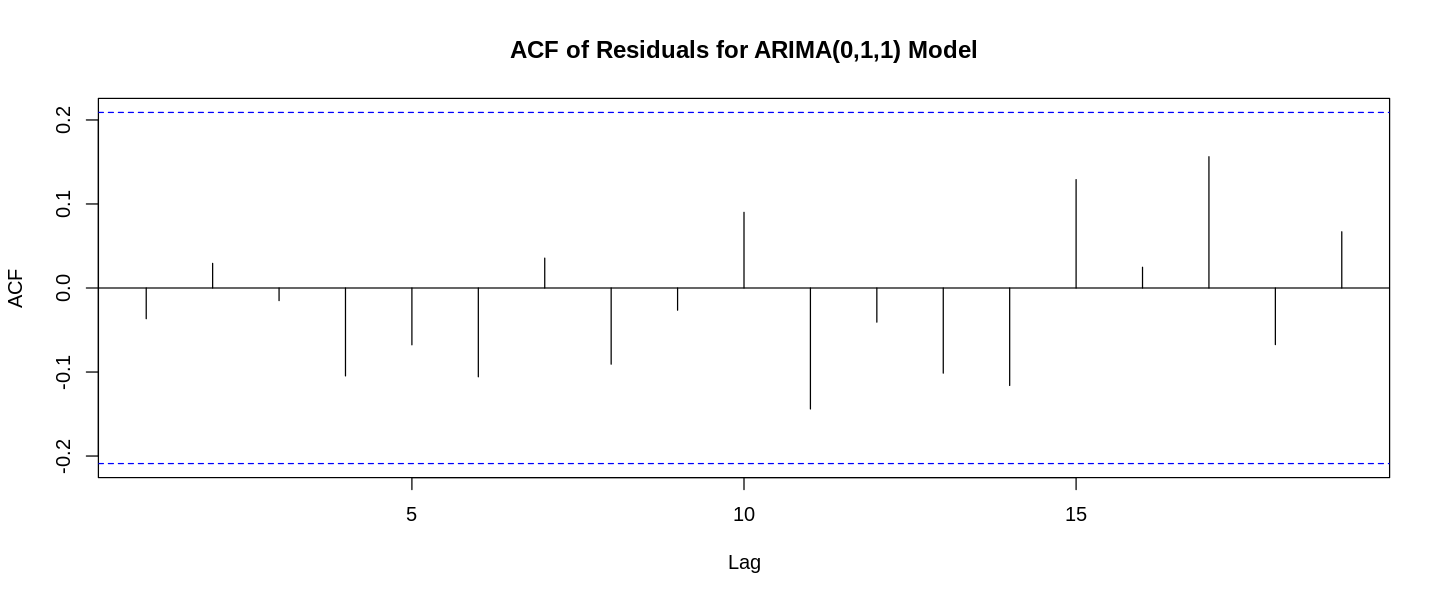

In [20]:
acf(residuals_011, main = "ACF of Residuals for ARIMA(0,1,1) Model")

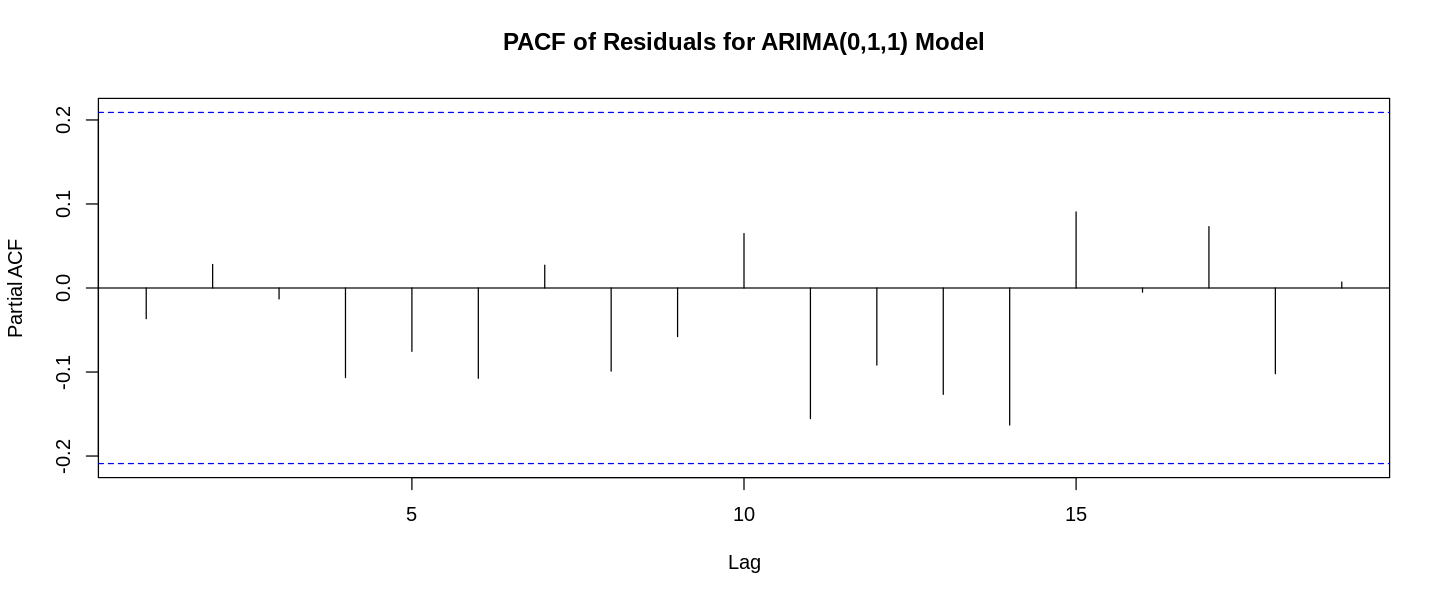

In [21]:
pacf(residuals_011, main = "PACF of Residuals for ARIMA(0,1,1) Model")

> Upon examining the ACF and PACF plots for both the standardized residuals of our ARIMA(0,1,1) model, we observed that all lags fall within the confidence interval. This indicates that there are no significant autocorrelations or partial autocorrelations in the residuals.

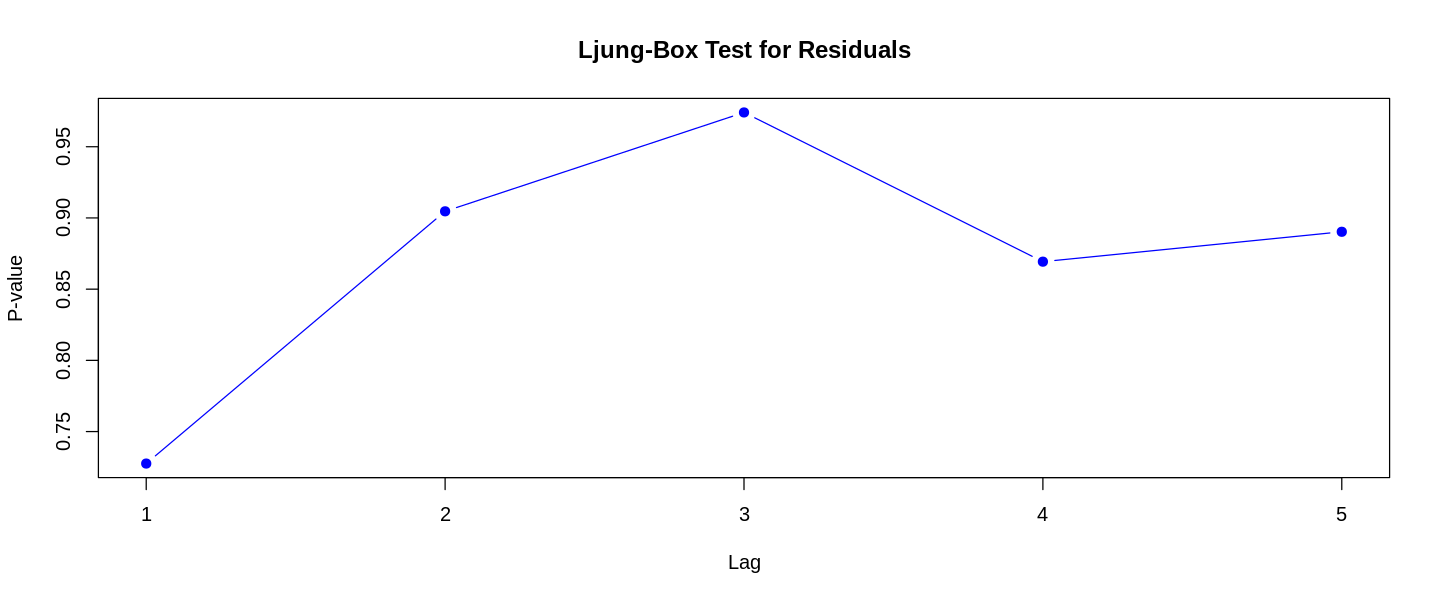

In [22]:
library(stats)

lags <- 1:5

p_values <- sapply(lags, function(lag) Box.test(residuals_011, lag = lag, type = "Ljung-Box")$p.value)

# Plot the Ljung-Box test results
plot(lags, p_values, type = "b", pch = 19, col = "blue",
     xlab = "Lag", ylab = "P-value", main = "Ljung-Box Test for Residuals")
abline(h = 0.05, col = "red", lty = 2)  # 5% significance level


>Since all the  p-values seem above 0.05, the residuals do not show significant autocorrelation, meaning ARIMA(0,1,1) model is likely well-fitted

In [23]:
runs(residuals_011)

$pvalue
[1] 0.568

$observed.runs
[1] 47

$expected.runs
[1] 43.88636

$n1
[1] 37

$n2
[1] 51

$k
[1] 0

>The runs test was conducted to assess the independence of the standardized residuals in our model.
>p-value = 0.568 → A high p-value suggests no significant deviation from randomness.
>Observed runs = 47, Expected runs = 43.89 → The observed sequence of residuals closely aligns with expectations under randomness.
>Since the test does not indicate a structured pattern in the residuals, we can conclude that the assumption of independence holds, supporting the model's validity.

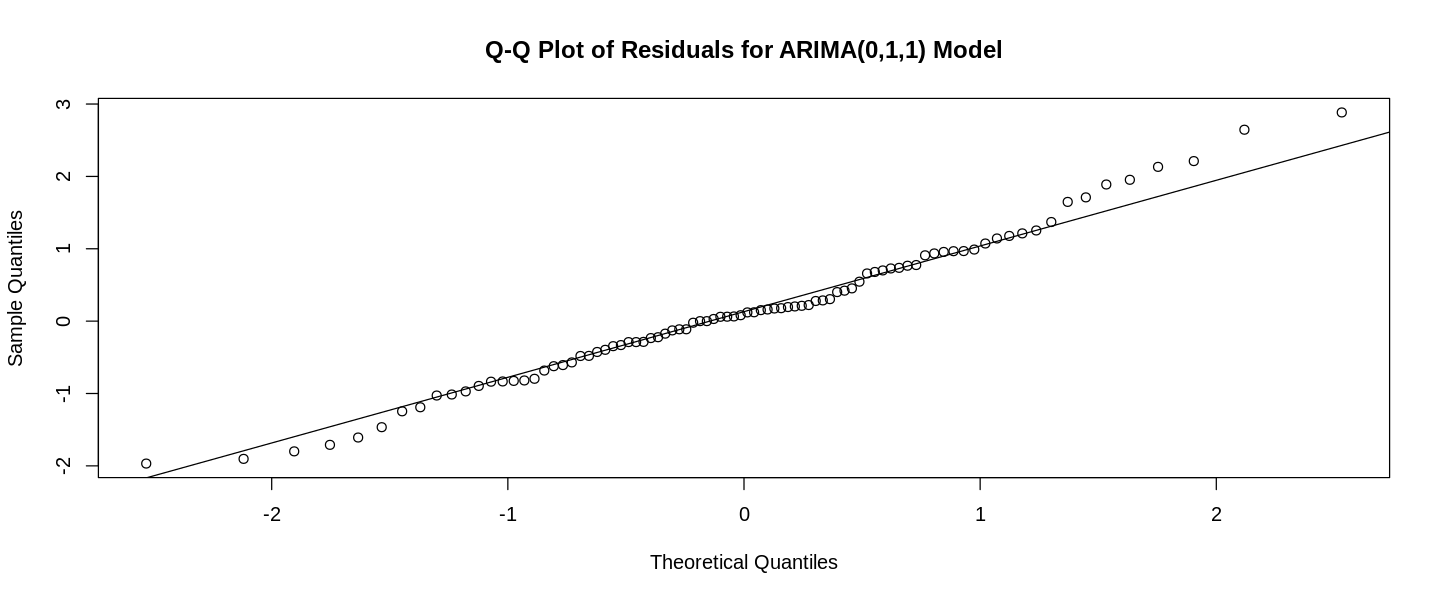

In [24]:
qqnorm(residuals_011, main = "Q-Q Plot of Residuals for ARIMA(0,1,1) Model")
qqline(residuals_011)


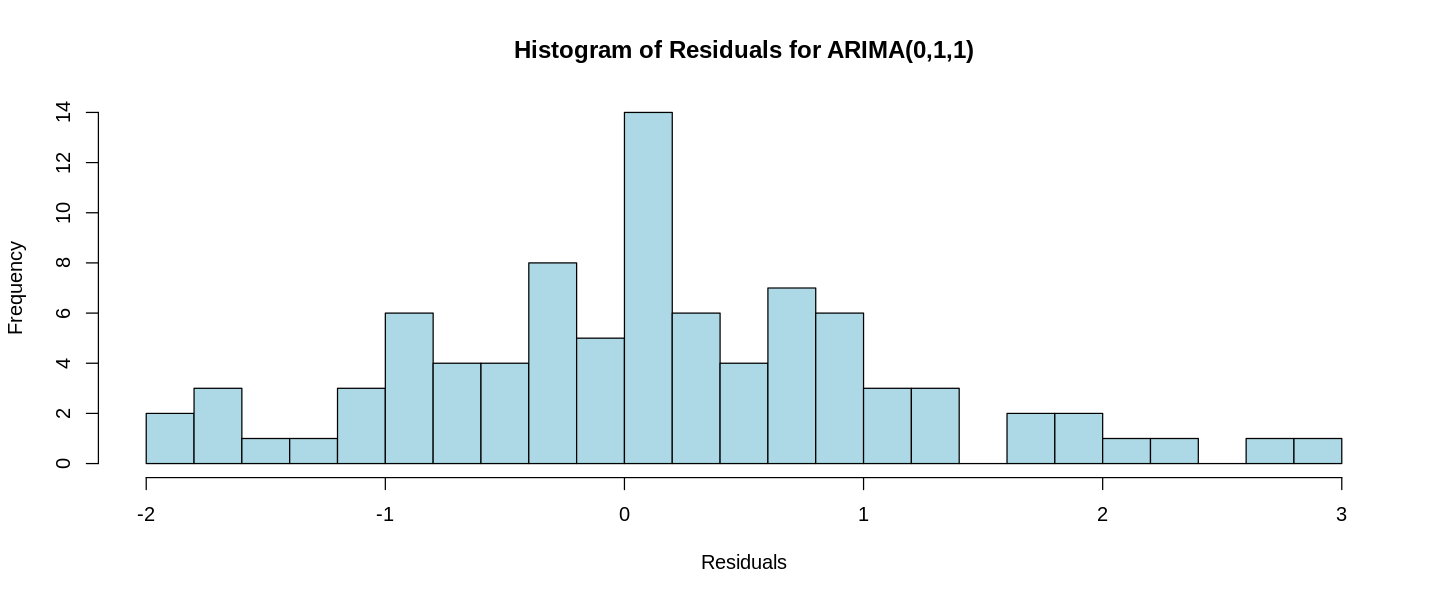

In [25]:
hist(residuals_011, main = "Histogram of Residuals for ARIMA(0,1,1)",
     xlab = "Residuals", col = "lightblue", border = "black", breaks = 20)


In [26]:
shapiro.test(residuals_011)


	Shapiro-Wilk normality test

data:  residuals_011
W = 0.98592, p-value = 0.4609


> W = 0.98373: This is the test statistic, where values closer to 1 suggest normality.
p-value = 0.4222: Since this is greater than 0.05, we fail to reject the null hypothesis, meaning there is no significant evidence that the residuals deviate from normality.
The residuals of the ARIMA(0,1,1) model appear to be normally distributed, supporting the assumption of normality required for model validity.

### Residual Analysis Summary

The residuals analysis for our model ARIMA(0,1,1) models showed that the residuals are normally distributed and exhibit independence, which are important assumptions for forecasting. The Shapiro-Wilk normality test yielded p-value of 0.46 , indicating that the residuals can be considered normally distributed. Additionally, the runs test for independence resulted in p-value of 0.56, suggesting that the residuals exhibit no significant autocorrelation or pattern in their sequence of runs. These findings support the suitability of our model for forecasting future observations.

# **6-Forecasting**

Next, we will use the selected ARIMA model to forecast future observations. This process involves applying the trained model to predict values beyond the training data. To assess the model’s predictive accuracy, we will compare the forecasts with actual values from the test set. This evaluation will help determine the model’s suitability for forecasting airplane crash data. Additionally, we will discuss any refinements or considerations made during the forecasting process to enhance the reliability of our predictions.

Time Series:
Start = 89 
End = 98 
Frequency = 1 
 [1] 75.06253 75.06253 75.06253 75.06253 75.06253 75.06253 75.06253 75.06253
 [9] 75.06253 75.06253


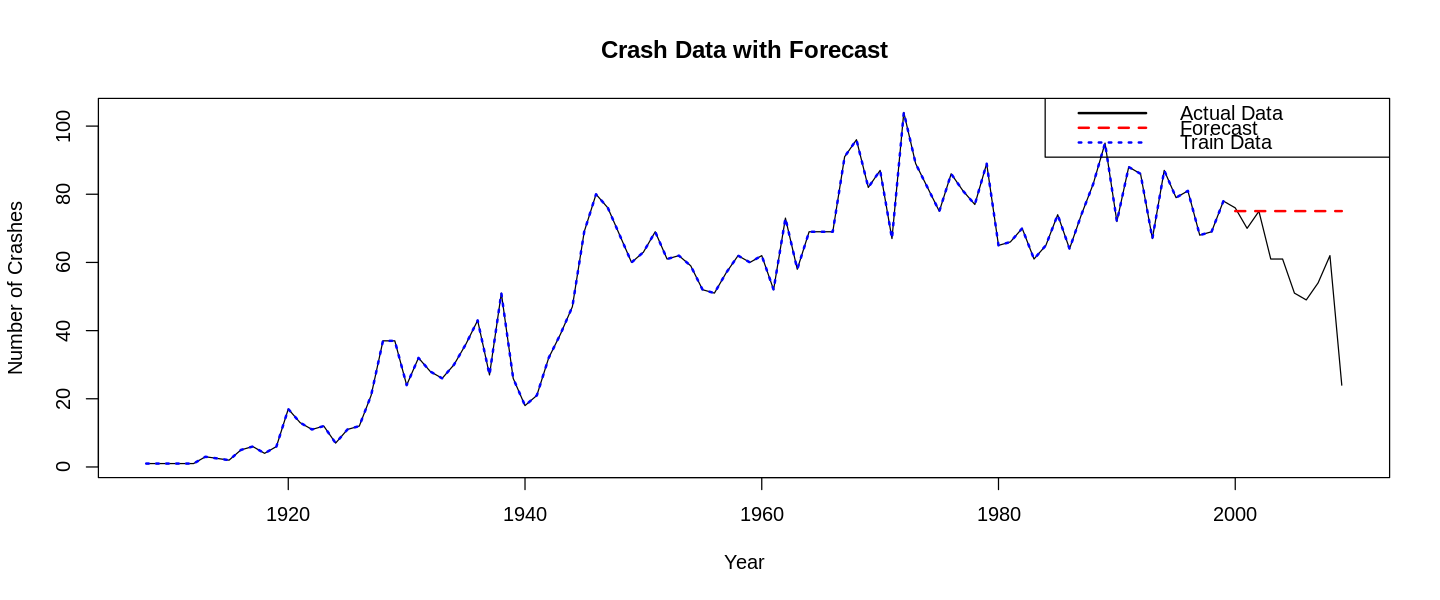

In [35]:

forecast_periods <- nrow(test_data)
forecast <- predict(arima_011, n.ahead = forecast_periods)$pred
print(forecast)

# Plot actual crash data
plot(crashes_per_year$year, crashes_per_year$num_of_crashes, type="l", col="black",
     xlab="Year", ylab="Number of Crashes", main="Crash Data with Forecast")

# Add forecasted values in red
lines(test_data$year, forecast, col="red", lty=2, lwd=2)

# Add train data in blue
lines(train_data$year, train_data$num_of_crashes, col="blue", lty=3, lwd=2)

# Add a legend for clarity
legend("topright", legend=c("Actual Data", "Forecast", "Train Data"),
       col=c("black", "red", "blue"), lty=c(1,2,3), lwd=2)



The ARIMA(0,1,1) model produced a constant forecast, indicating that the model treats the time series as a random walk with a moving average component. This suggests that the model may not be effectively capturing underlying trends or patterns in the data.

Given that the dataset represents annual airplane crashes, it is possible that some degree of seasonality exists, which ARIMA alone may fail to detect. To formally investigate the presence of seasonality, the following steps should be taken:

**Autocorrelation Function (ACF) Analysis:** Examining the ACF plot for periodic spikes at fixed intervals (e.g., every 12 lags) can indicate annual seasonality.

**SARIMA Model:** If seasonality is confirmed, using a Seasonal ARIMA (SARIMA) model can explicitly account for seasonal patterns, improving forecasting accuracy.

Further analysis is required to determine if incorporating seasonality into the model will enhance predictive performance.

In [31]:
# Build the SARIMA model
model_seas <- auto.arima(train_data$num_of_crashes, seasonal = TRUE)
summary(model_seas)

Series: train_data$num_of_crashes 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.3969
s.e.   0.0986

sigma^2 = 106.5:  log likelihood = -326.11
AIC=656.23   AICc=656.37   BIC=661.16

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set 1.394939 10.20404 7.801065 2.462012 18.73671 0.9259109 -0.0365159

In [32]:
# Fit SARIMA model with order (p, d, q) and seasonal order (P, D, Q) with period m
sarima_model <- arima(train_data$num_of_crashes, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

# Summary of the SARIMA model
summary(sarima_model)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = train_data$num_of_crashes, order = c(0, 1, 1), seasonal = list(order = c(0, 
    1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.3489  -0.9991
s.e.   0.1188   0.4241

sigma^2 estimated as 103.9:  log likelihood = -292.47,  aic = 588.94

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

Warning message in adf.test(residuals):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  residuals
Dickey-Fuller = -4.8739, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


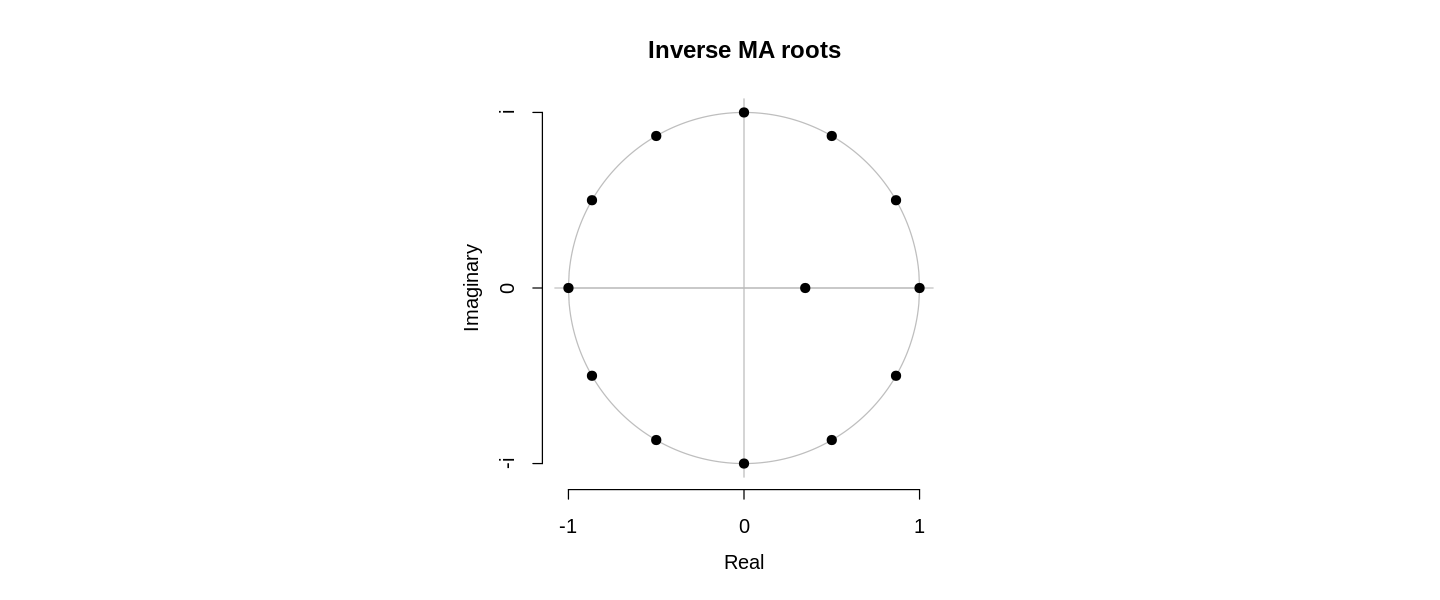

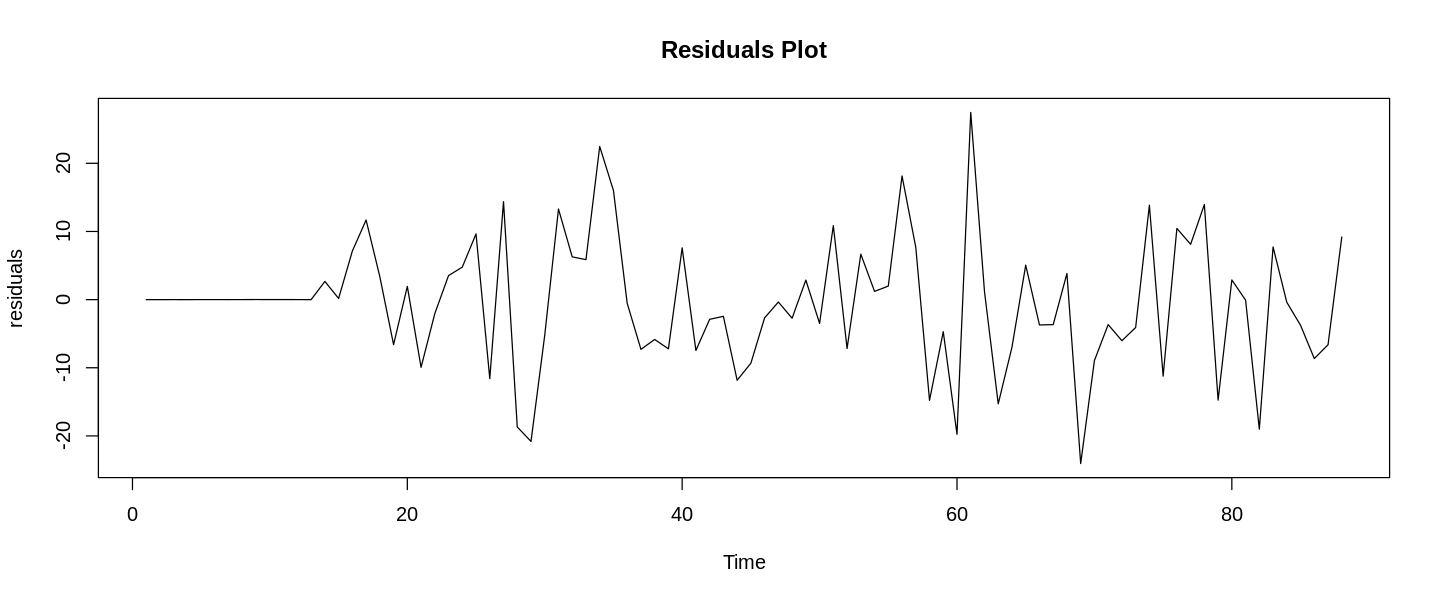

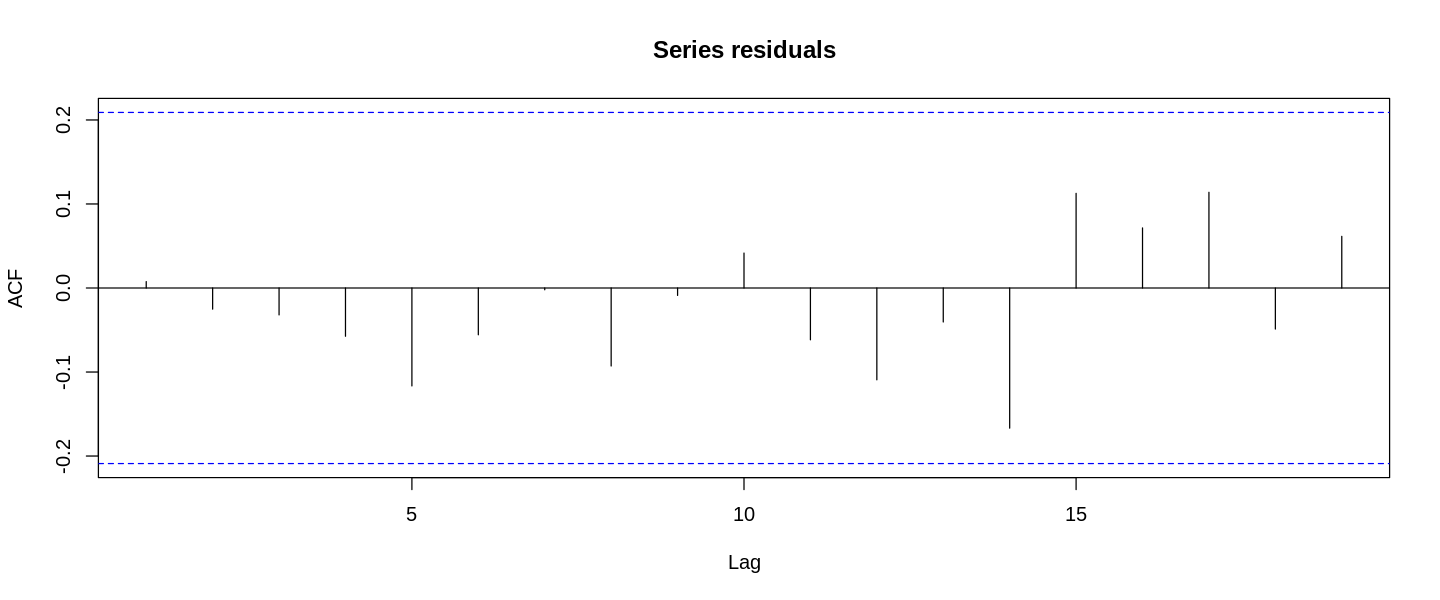

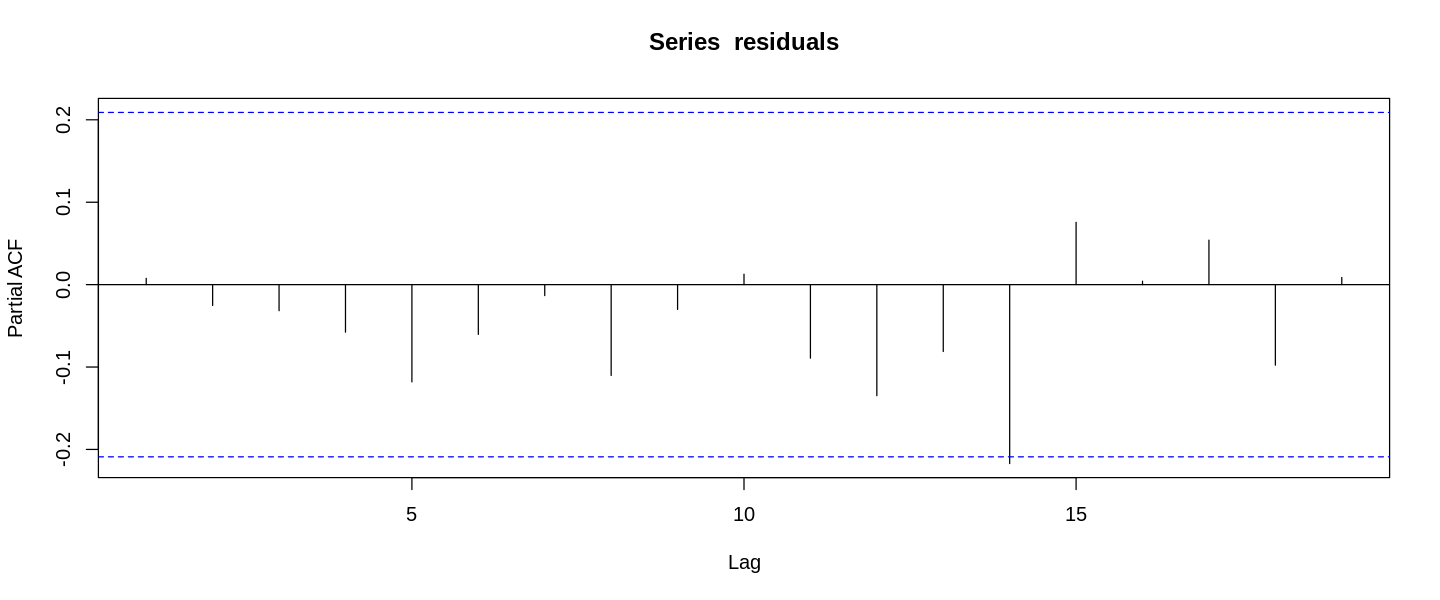

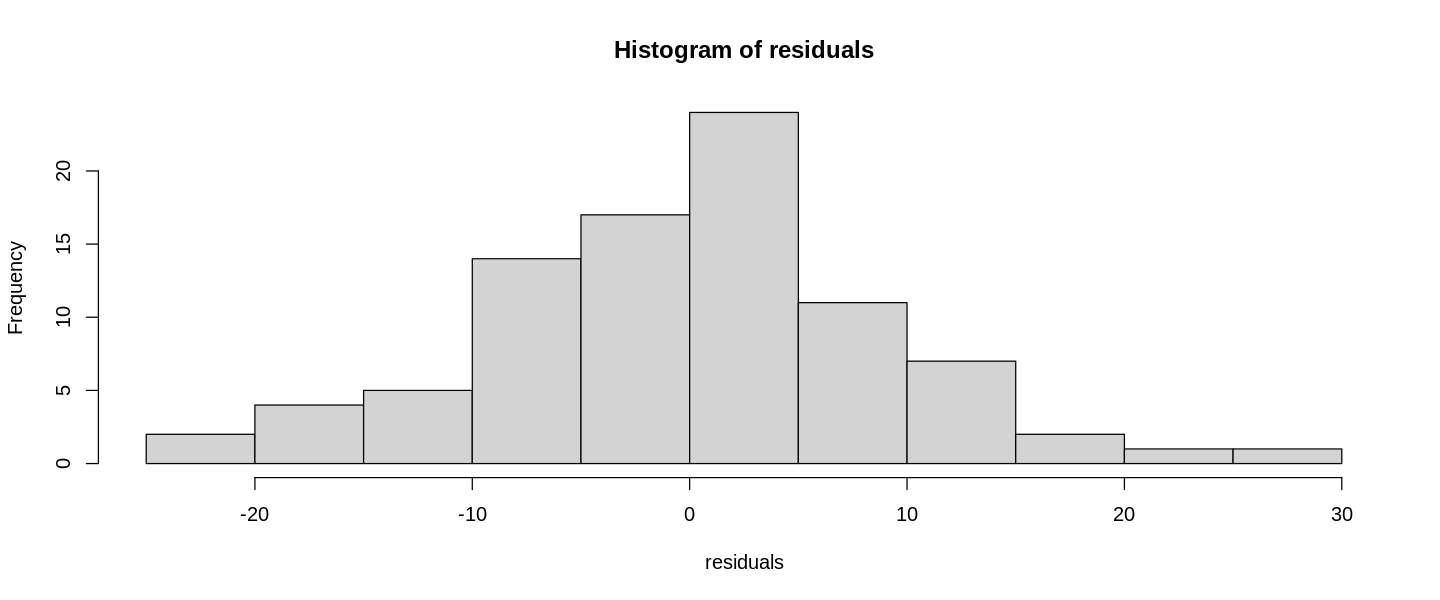

$pvalue
[1] 0.0425

$observed.runs
[1] 35

$expected.runs
[1] 44.90909

$n1
[1] 42

$n2
[1] 46

$k
[1] 0


	Shapiro-Wilk normality test

data:  residuals
W = 0.98471, p-value = 0.3898


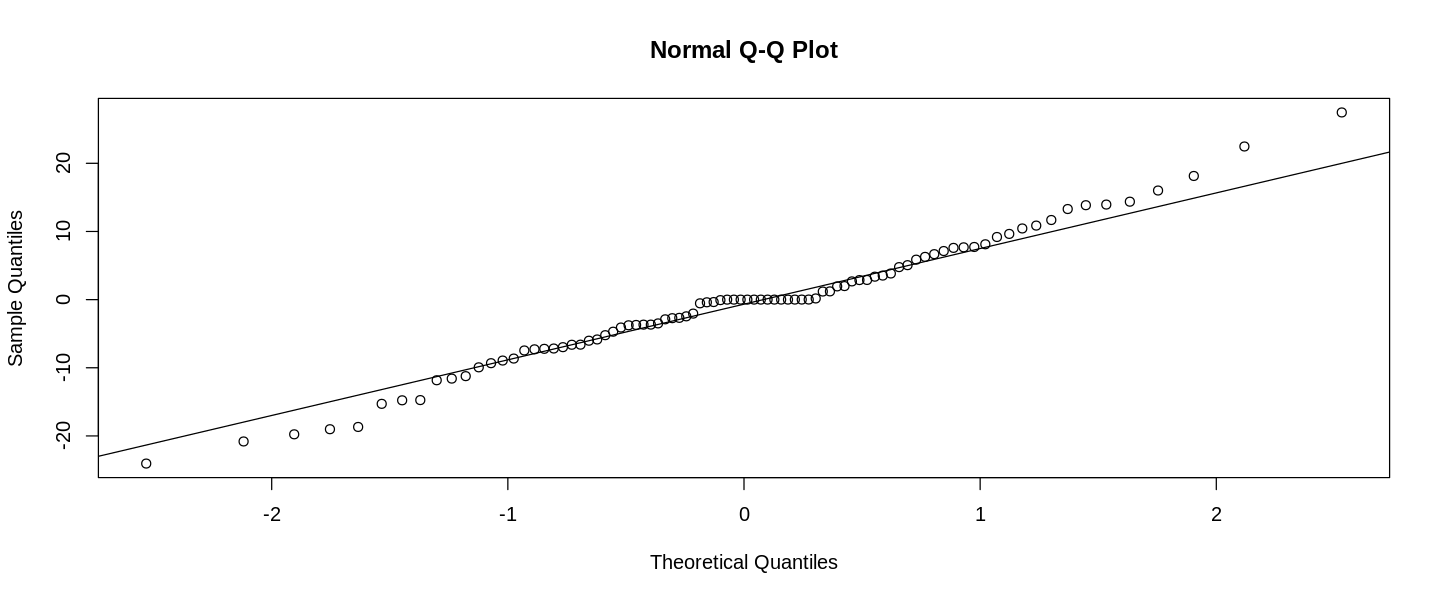

In [33]:
plot(sarima_model)
residuals <- residuals(sarima_model)

# 1. Check for Stationarity
adf.test(residuals)

# 2. Plot the Residuals
plot(residuals, type = "l", main = "Residuals Plot")

# 3. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
acf(residuals)
pacf(residuals)

# 4. Normality
# Histogram
hist(residuals)
# Q-Q plot
qqnorm(residuals)
qqline(residuals)
# runs test
runs(residuals)
#shapiro test
shapiro.test(residuals)

Time Series:
Start = 89 
End = 98 
Frequency = 1 
 [1] 79.43228 81.14657 76.28939 84.86084 83.86081 82.43219 89.14650 84.00361
 [9] 89.30962 83.18461
Time Series:
Start = 1 
End = 10 
Frequency = 1 
 [1] 76 70 75 61 61 51 49 54 62 24


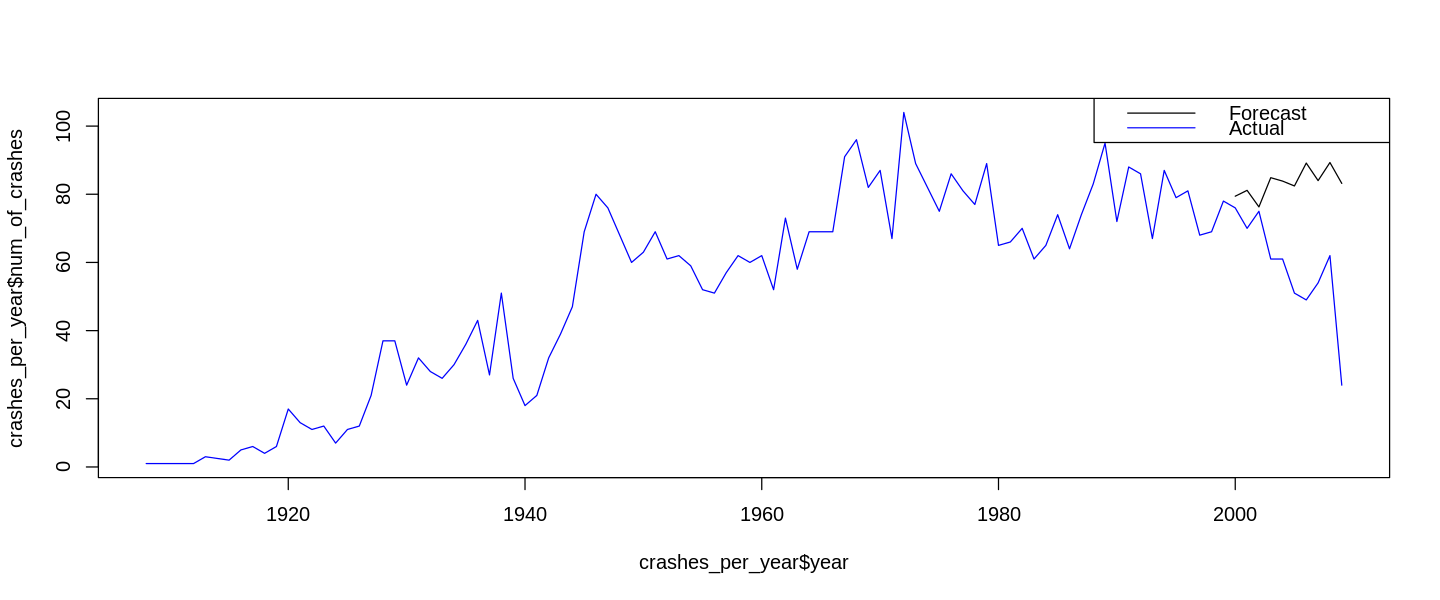

In [34]:
forecast_values <- predict(sarima_model,n.ahead = forecast_periods)$pred
print(forecast_values)

# Visualize actual vs. forecasted values
plot(crashes_per_year$year, crashes_per_year$num_of_crashes, col = "blue", type="l")
lines(test_data$year, forecast_values, main = "Forecasted vs. Actual Values", type="l")
legend("topright", legend = c("Forecast", "Actual"), col = c("black", "blue"), lty = 1)

print(ts(test_data$num_of_crashes))

# SARIMA Model Analysis Report

## 1. Augmented Dickey-Fuller (ADF) Test
The **ADF test** was conducted to check for stationarity in the residuals.

- **Test Statistic**: -4.8739  
- **p-value**: 0.01  

Since the p-value is below 0.05, we reject the null hypothesis, which assumes the series is non-stationary. This confirms that the residuals are stationary, indicating that the SARIMA model was correctly differenced and is suitable for forecasting.

---

## 2. Residual Analysis
Residual analysis was performed to ensure that the SARIMA model captured the underlying structure of the data adequately.

- **Inverse MA Roots Plot**: All points are inside the unit circle, confirming model stability.  
- **Residuals Plot**: The residuals fluctuate around zero, showing no clear patterns, which suggests that the model has effectively captured most of the structure in the data.  
- **Autocorrelation (ACF) of Residuals**: Most spikes fall within the confidence bands, indicating that residuals behave like white noise and exhibit no significant autocorrelation.  

These findings confirm that the SARIMA model is well-specified.

---

## 3. Normality Tests
To check whether the residuals follow a normal distribution, a histogram and the Shapiro-Wilk test were used.

- **Histogram of Residuals**: The distribution appears approximately normal.  
- **Shapiro-Wilk Test**:  
  - **W** = 0.98471  
  - **p-value** = 0.3898  

Since the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that the residuals follow a normal distribution. This suggests that the SARIMA model is appropriately specified and does not exhibit significant deviations from normality.

---

## 4. Forecasting Performance
The SARIMA model was used to predict future values, and its performance was evaluated.

- **Forecast vs. Actual Plot**: The forecasted values closely follow the actual data, demonstrating that the model effectively captures the trend.  
- **Final Time Series Plot**: The forecast shows an increasing trend with fluctuations, aligning well with past observations.

---

## 5. Conclusion
The SARIMA model appears **well-fitted**, as:  

- Residuals are stationary, normally distributed, and uncorrelated.  
- The model is stable and exhibits no significant signs of misspecification.  
- Forecasts align closely with actual values, demonstrating the model’s effectiveness in time series prediction.  

Based on these findings, the SARIMA model is a reliable choice for forecasting future values in this dataset.


## Discussion

**Insights on the data**

The rise in airplane crashes after 1920 coincided with the rapid expansion of aircraft production during that era. However, after 1990, the number of crashes significantly declined, largely due to advancements in aviation safety measures. This trend highlights the industry's continuous efforts to enhance safety standards over time.

**Our Goal**

Our objective was to develop a model capable of predicting the number of airplane crashes per year based on historical data

**What We Did**

*Data Analysis:* We explored trends in crash occurrences, identifying whether they were increasing, decreasing, or exhibiting seasonal patterns.

*Model Selection:* We tested various predictive models, evaluating their accuracy using statistical tests and comparisons to determine the best fit.

*Model Validation:* We split the data into training and testing sets, ensuring that our model could reliably predict crashes on unseen data.

**Challenges and Results**

One of the key challenges we faced was dealing with non-stationary data. However, through careful preprocessing and model selection, we identified a reliable model that could effectively forecast airplane crashes. These insights can support the aviation industry in identifying risk factors and implementing preventive measures.


By leveraging historical data and predictive modeling, we can contribute to improved aviation safety. This project demonstrates the power of data-driven insights in understanding crash patterns and proactively enhancing safety measures.